# ASSIGNED Enzyme kinetics

The following data was obtained for an enzyme reaction.

In [1]:
import numpy as np

Cs = np.array([1, 2, 3, 5, 7, 10, 15, 20]) # mmol
rate = np.array([0.2, 0.22, 0.30, 0.45, 0.41, 0.50, 0.40, 0.33])

It is believed that the rate of reaction should follow $r = \frac{r_{max} C_S}{K_M + C_S}$. Use the data above to determine $r_{max}$ and $K_M$. Discuss whether this model is good for the data. A colleague thinks maybe that the model is not good for all concentrations. Determine if there is a concentration range where the model is better.

## solution

This is a nonlinear regression problem. You should start by plotting the data.

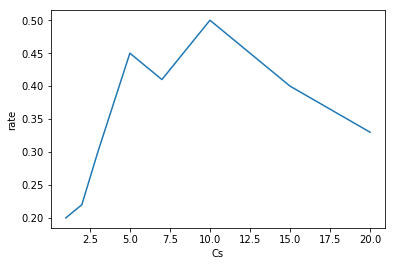

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(Cs, rate)
plt.xlabel('Cs')
plt.ylabel('rate')

It appears that the rate increases with Cs, and then probably decreases. It is not totally clear, since there appears to be noise near the top (the up and down at the peak). Nevertheless, we can estimate what rmax might be and it is around 0.45. Km is a little more subtle, but it must be small compared to Cs at rmax, so we can guess a value of 1.

We are not given enough information to put units on these parameters.

In [1]:
from pycse import nlinfit

def model(Cs, rmax, Km):
    return rmax * Cs / (Km + Cs)

p, pint, se = nlinfit(model, Cs, rate, [0.45, 1])

print('r_max = {:1.2f} and K_m = {:1.2f}.'.format(*p))

r_max = 0.46 and K_m = 1.30

We should plot the model on the data.

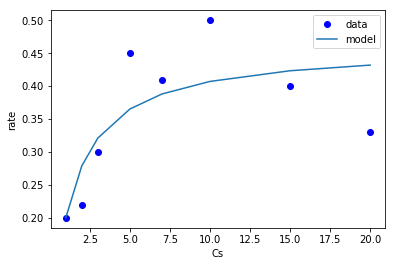

In [1]:
plt.plot(Cs, rate, 'bo ')
plt.plot(Cs, model(Cs, *p))
plt.legend(['data', 'model'])
plt.xlabel('Cs')
plt.ylabel('rate')

The fit does not look that good. The problem is that if the rate actually decreases with increasing Cs that the model is not good once the rate starts decreasing. If we fit the data only up to Cs = 10, we get a better fit in that range. Clearly, however, the model is not good for Cs > 10. Here we fit to the data up to Cs=10.

In [1]:
p, pint, se = nlinfit(model, Cs[0:-2], rate[0:-2], [0.45, 1])

print('r_max = {:1.2f} and K_m = {:1.2f}.'.format(*p))

r_max = 0.63 and K_m = 2.95.

We should plot the model on the data.

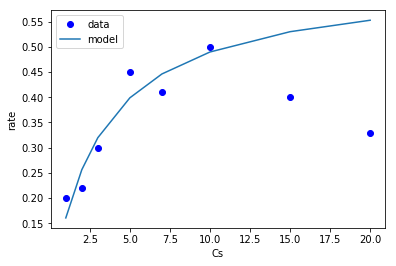

In [1]:
plt.plot(Cs, rate, 'bo ')
plt.plot(Cs, model(Cs, *p))
plt.legend(['data', 'model'])
plt.xlabel('Cs')
plt.ylabel('rate')

You can see we fit the data pretty well up to Cs=10, but after that our model does a poor job of predicting the data.